In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
import pyatomdb as pa
import pickle as pck
from astropy import constants as co
from astropy import units as un

In [3]:
powerdata = loadtxt("Power_atomdb_3.0.8.dat", skiprows=1)

In [4]:
?loadtxt

In [6]:
print powerdata

[[  1.         1.       -23.537226 ..., -18.914837 -18.952001 -18.989153]
 [  1.         2.       -23.127354 ..., -22.438915 -22.410951 -22.389559]
 [  2.         1.       -28.57275  ..., -19.214165 -19.238079 -19.267038]
 ..., 
 [ 28.        27.       -17.776584 ..., -19.041287 -19.042134 -19.046961]
 [ 28.        28.       -17.066767 ..., -19.134703 -19.137854 -19.143506]
 [ 28.        29.       -17.067491 ..., -19.325356 -19.332041 -19.3405  ]]


In [7]:
powerdata.shape

(434, 53)

In [152]:
with open("timelist.pkl","r") as f:
    timelist = pck.load(f)
with open("tlist.pkl","r") as f:
    tlist = pck.load(f)
with open("nlist.pkl","r") as f:
    nlist = pck.load(f)
with open("enuclist.pkl","r") as f:
    enuclist = pck.load(f)
with open("ener_py.pkl","r") as f:
    ener = pck.load(f)

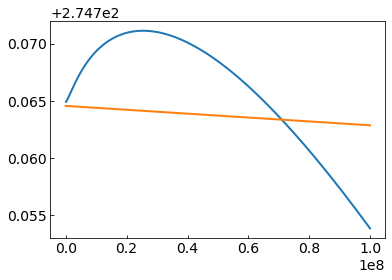

In [153]:
plot(timelist[1:], -enuclist[1:])
plot(timelist, ener)
savefig("rad.png")

In [154]:
elements=["He","C", "N", "O", "Ne", "Mg", "Si", "S", "Ar", "Ca", "Fe", "Ni"]
zlist=[2,6,7,8,10,12,14,16,18,20,26,28]

In [ ]:
mlist=[4.00260200000000,12.0110000000000,14.0067400000000,15.9994000000000,20.1797000000000,24.3050000000000,28.0855000000000, \
       32.0680000000000,39.9480000000000,40.0780000000000,55.8470000000000,58.6934000000000]
print(size(mlist))


In [157]:
abunlist=[0.085,3.31e-4,9.12e-5,6.61e-4,8.32e-5,1.9e-6,2.63e-5,3.31e-5,2.45e-6,1.58e-5,6.31e-6,1.99e-6]
print(size(abunlist))
elements=array(elements)
zlist=array(zlist)
mlist=array(mlist)
abunlist=array(abunlist)

12


In [158]:
mabar_h = 0.904347600946928
mabar_e = 5.446170220743115e-4

In [159]:
#mflist=mlist*abunlist/((mlist*abunlist).sum()+0.904+5.45e-4*1.2)
mflist=mlist*abunlist/((mlist*abunlist).sum()+mabar_h+mabar_e*1.213)
print(mflist)

[  2.68783049e-01   3.14085367e-03   1.00918886e-03   8.35498546e-03
   1.32641240e-03   3.64829349e-05   5.83550507e-04   8.38572104e-04
   7.73217488e-05   5.00269090e-04   2.78400333e-04   9.22747521e-05]


In [160]:
norm=nlist[0]
nnlist = nlist/norm
print(nnlist[16])

1.0


In [161]:
tem_plist = linspace(4,9,51)
print(tem_plist)

[ 4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4
  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4
  8.5  8.6  8.7  8.8  8.9  9. ]


In [117]:
%%capture
ener=zeros(tlist.size)
kk = 0
frac_p = {}
for kk in range(tlist.size):
    for ii in range(elements.size):
        if(kk==0):
            frac_array=pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk])
            frac_p[ii] = pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk])
        else:
            frac_array = pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk], init_pop=frac_p[ii], \
                                                    tau=nlist[kk] * 0.000521906318159 * co.N_A.value/mabar_e*1.e5)
            frac_p[ii] = frac_array
        for jj in range(zlist[ii]+1):
            temlog = log10(tlist[kk])
            pwindex = powerdata[logical_and(powerdata[:,0]==zlist[ii], \
                                       powerdata[:,1]==jj+1), 2:]
      #  print(pwindex.size, tem_plist.size)
            pwindex_t = interp(temlog, tem_plist, pwindex[0])
#            print(zlist[ii], jj, nlist[0]*0.000521906318159*co.N_A.value/mabar_e, \
             # nlist[0] * mflist[ii] * co.N_A.value/mlist[ii] * frac_array[jj], mflist[ii]  * frac_array[jj], \
             # frac_array[jj])
            s = 10**pwindex_t * nlist[kk] * mflist[ii] * frac_array[jj] * 0.000521906318159 * co.N_A.value/mlist[ii] * \
                co.N_A.value/mabar_e
            ener[kk] += s
        

In [164]:
%%capture
ener=zeros(tlist.size)
kk = 0
frac_p = {}
for kk in range(tlist.size):
    for ii in range(elements.size):
        if(kk==0):
            frac_array=pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk])
            frac_p[ii] = zeros((tlist.size, frac_array.size))
            frac_p[ii][kk,:] = pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk])
            frac_p[ii][kk,:][frac_p[ii][kk,:]*mflist[ii]<1.e-10]=1.e-10/mflist[ii]
            frac_p[ii][kk,:]=frac_p[ii][kk,:]/frac_p[ii][kk,:].sum()
            if (abs(frac_p[ii][kk,:].sum()-1)>1.e-3):
                raise ValueError("summation!")
        else:
            frac_array = pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk], init_pop=frac_p[ii][kk-1,:], \
                                                    tau=nlist[kk] * 0.000521906318159 * co.N_A.value/mabar_e*1.e5)
            frac_p[ii][kk,:] = frac_array
            frac_p[ii][kk,:][frac_p[ii][kk,:]*mflist[ii]<1.e-10]=1.e-10/mflist[ii]
            frac_p[ii][kk,:]=frac_p[ii][kk,:]/frac_p[ii][kk,:].sum()
            if (abs(frac_p[ii][kk,:].sum()-1)>1.e-3):
                raise ValueError("summation!")
        for jj in range(zlist[ii]+1):
            temlog = log10(tlist[kk])
            pwindex = powerdata[logical_and(powerdata[:,0]==zlist[ii], \
                                       powerdata[:,1]==jj+1), 2:]
      #  print(pwindex.size, tem_plist.size)
            pwindex_t = interp(temlog, tem_plist, pwindex[0])
#            print(zlist[ii], jj, nlist[0]*0.000521906318159*co.N_A.value/mabar_e, \
             # nlist[0] * mflist[ii] * co.N_A.value/mlist[ii] * frac_array[jj], mflist[ii]  * frac_array[jj], \
             # frac_array[jj])
            s = 10**pwindex_t * nlist[kk] * mflist[ii] * frac_array[jj] * 0.000521906318159 * co.N_A.value/mlist[ii] * \
                co.N_A.value/mabar_e
            ener[kk] += s
        

In [118]:
print(ener)

[ 274.76455011  274.76447908  274.76442692  274.76437477  274.76432263
  274.7642705   274.76421837  274.76416625  274.76411413  274.76406202
  274.76400992  274.76395782  274.76390573  274.76385364  274.76380156
  274.76374948  274.76369741  274.76364534  274.76359327  274.76354121
  274.76348916  274.7634371   274.76338505  274.76333301  274.76328096
  274.76322892  274.76317689  274.76312485  274.76307282  274.7630208
  274.76296877  274.76291675  274.76286473  274.76281271  274.76276069
  274.76270868  274.76265667  274.76260466  274.76255265  274.76250065
  274.76244864  274.76239664  274.76234464  274.76229264  274.76224064
  274.76218865  274.76213665  274.76208466  274.76203266  274.76198067
  274.76192868  274.76187669  274.7618247   274.76177272  274.76172073
  274.76166874  274.76161676  274.76156477  274.76151279  274.76146081
  274.76140882  274.76135684  274.76130486  274.76125288  274.7612009
  274.76114891  274.76109693  274.76104495  274.76099297  274.76094099
  274.76

In [166]:
with open("ener2_py.pkl","w") as f:
    pck.dump(ener,f)

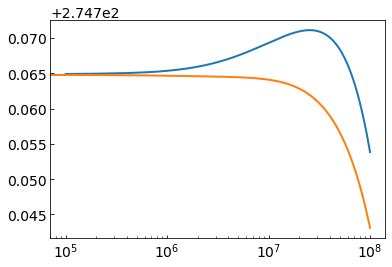

In [165]:

plot(timelist[1:], -enuclist[1:])
plot(timelist, ener)
xscale("log")

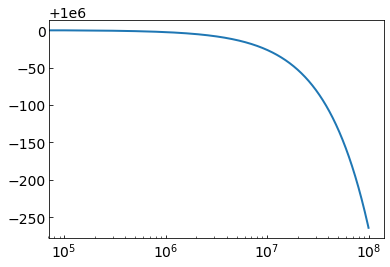

In [167]:
plot(timelist, tlist)
xscale("log")

In [39]:
pwd

u'/Users/gaoyuan/programs/bitbucket/nei_test/radi'

In [40]:
#try longer

In [123]:
with open("./longer/timelist.pkl","r") as f:
    timelist = pck.load(f)
with open("./longer/tlist.pkl","r") as f:
    tlist = pck.load(f)
with open("./longer/nlist.pkl","r") as f:
    nlist = pck.load(f)
with open("./longer/enuclist.pkl","r") as f:
    enuclist = pck.load(f)
with open("./longer/enerlist.pkl","r") as f:
    enerlist = pck.load(f)

In [124]:
nnlist = nlist/1.67e-23
print(nnlist)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


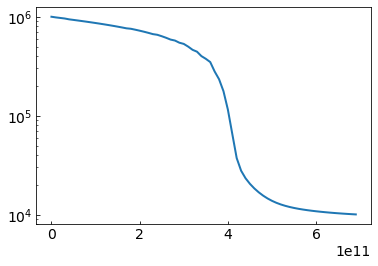

In [125]:
plot(timelist, tlist)
yscale("log")

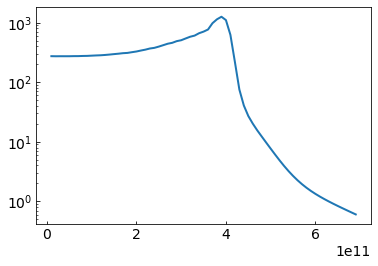

In [126]:
plot(timelist[1:], -enuclist[1:])
yscale("log")

In [143]:
%%capture
ener=zeros(tlist.size)
kk = 0
frac_p = {}
for kk in range(tlist.size):
    for ii in range(elements.size):
        if(kk==0):
            frac_array=pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk])
            frac_p[ii] = zeros((tlist.size, frac_array.size))
            frac_p[ii][kk,:] = pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk])
            frac_p[ii][kk,:][frac_p[ii][kk,:]*mflist[ii]<1.e-10]=1.e-10/mflist[ii]
            frac_p[ii][kk,:]=frac_p[ii][kk,:]/frac_p[ii][kk,:].sum()
            if (abs(frac_p[ii][kk,:].sum()-1)>1.e-3):
                raise ValueError("summation!")
        else:
            frac_array = pa.apec.solve_ionbal_eigen(zlist[ii], tlist[kk], init_pop=frac_p[ii][kk-1,:], \
                                                    tau=nlist[kk] * 0.000521906318159 * co.N_A.value/mabar_e*1.e10)
            frac_p[ii][kk,:] = frac_array
            frac_p[ii][kk,:][frac_p[ii][kk,:]*mflist[ii]<1.e-10]=1.e-10/mflist[ii]
            frac_p[ii][kk,:]=frac_p[ii][kk,:]/frac_p[ii][kk,:].sum()
            if (abs(frac_p[ii][kk,:].sum()-1)>1.e-3):
                raise ValueError("summation!")
        for jj in range(zlist[ii]+1):
            temlog = log10(tlist[kk])
            pwindex = powerdata[logical_and(powerdata[:,0]==zlist[ii], \
                                       powerdata[:,1]==jj+1), 2:]
      #  print(pwindex.size, tem_plist.size)
            pwindex_t = interp(temlog, tem_plist, pwindex[0])
#            print(zlist[ii], jj, nlist[0]*0.000521906318159*co.N_A.value/mabar_e, \
             # nlist[0] * mflist[ii] * co.N_A.value/mlist[ii] * frac_array[jj], mflist[ii]  * frac_array[jj], \
             # frac_array[jj])
            s = 10**pwindex_t * nlist[kk] * mflist[ii] * frac_array[jj] * 0.000521906318159 * co.N_A.value/mlist[ii] * \
                co.N_A.value/mabar_e
            ener[kk] += s
        

In [144]:
print(frac_p[3][1,:]*mflist[3])
print(nlist[0]*0.000521906318159 * co.N_A.value/mabar_e)

[  1.65635828e-10   9.99999976e-11   9.99999976e-11   1.63206803e-09
   4.45401225e-07   3.95001318e-05   8.24161093e-03   7.33889369e-05
   3.80543518e-08]
9.63759614919


(260, 290)

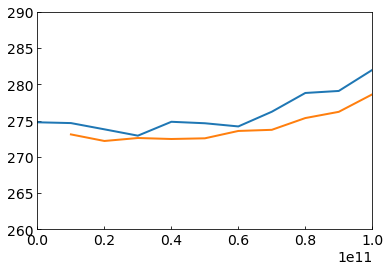

In [145]:
plot(timelist, ener)
plot(timelist[1:], -enuclist[1:])
#yscale("log")
#xscale("log")
xlim((0,1.e11))
ylim((260,290))

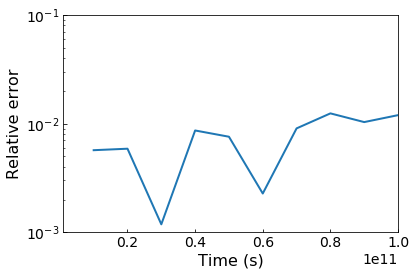

In [151]:

plot(timelist[1:], abs(ener[1:]+enuclist[1:])/ener[1:])
xlim((1.e9,1.e11))
ylim((1.e-3,1.e-1))
yscale("log")
#xscale("log")
xlabel("Time (s)")
ylabel("Relative error")
savefig("rad_test.pdf")

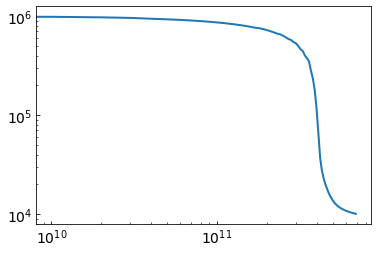

In [67]:
plot(timelist, tlist)
yscale("log")
xscale("log")

In [57]:
print(nlist)

[  1.67000000e-23   1.67000000e-23   1.67000000e-23   1.67000000e-23
   1.67000000e-23   1.67000000e-23   1.67000000e-23   1.67000000e-23
   1.67000000e-23   1.67000000e-23   1.67000000e-23   1.67000000e-23
   1.67000000e-23   1.67000000e-23   1.67000000e-23   1.67000000e-23
   1.67000000e-23   1.67000000e-23   1.67000000e-23   1.67000000e-23
   1.67000000e-23   1.67000000e-23   1.67000000e-23   1.67000000e-23
   1.67000000e-23   1.67000000e-23   1.67000000e-23   1.67000000e-23
   1.67000000e-23   1.67000000e-23   1.67000000e-23   1.67000000e-23
   1.67000000e-23   1.67000000e-23   1.67000000e-23   1.67000000e-23
   1.67000000e-23   1.67000000e-23   1.67000000e-23   1.67000000e-23
   1.67000000e-23   1.67000000e-23   1.67000000e-23   1.67000000e-23
   1.67000000e-23   1.67000000e-23   1.67000000e-23   1.67000000e-23
   1.67000000e-23   1.67000000e-23   1.67000000e-23   1.67000000e-23
   1.67000000e-23   1.67000000e-23   1.67000000e-23   1.67000000e-23
   1.67000000e-23   1.67000000e-23